In [1]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#to see length of training dataset
len(x_train)

60000

In [5]:
##to see length of testing dataset
len(x_test)

10000

In [6]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [7]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

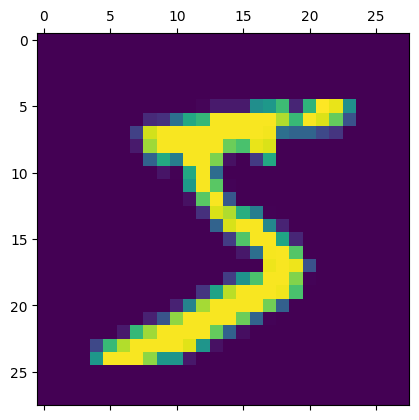

In [9]:
#to see how first image look
plt.matshow(x_train[0])

In [10]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6528 - accuracy: 0.8363 - val_loss: 0.3498 - val_accuracy: 0.9063
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3316 - accuracy: 0.9077 - val_loss: 0.2865 - val_accuracy: 0.9204
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2833 - accuracy: 0.9202 - val_loss: 0.2571 - val_accuracy: 0.9284
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2538 - accuracy: 0.9284 - val_loss: 0.2335 - val_accuracy: 0.9338
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2314 - accuracy: 0.9358 - val_loss: 0.2161 - val_accuracy: 0.9386
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2131 - accuracy: 0.9412 - val_loss: 0.2019 - val_accuracy: 0.9437
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1977 - accuracy: 0.9445 - val_loss: 0.1870 - val_accuracy:

In [16]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1585 - accuracy: 0.9543
Loss=0.158
Accuracy=0.954


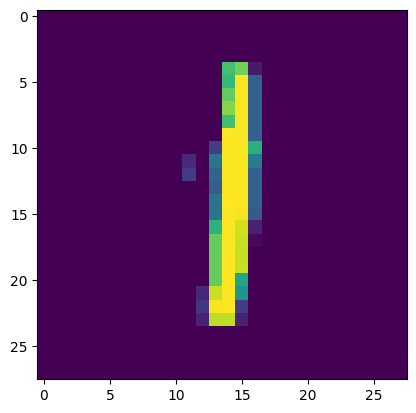

In [28]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [29]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 0s 1ms/step
Handwritten number in the image is= 1


In [19]:
history.history??

Type:        dict
String form: {'loss': [0.6527805328369141, 0.33156871795654297, 0.2833452820777893, 0.2538151741027832, 0.23141109943389893, 0.21308498084545135, 0.1976666897535324, 0.18439115583896637, 0.1729944795370102, 0.1628676950931549], 'accuracy': [0.8363166451454163, 0.9077000021934509, 0.9202166795730591, 0.9283999800682068, 0.9358333349227905, 0.9412000179290771, 0.9445333480834961, 0.9488000273704529, 0.9519000053405762, 0.9542999863624573], 'val_loss': [0.3498486578464508, 0.2864556312561035, 0.2571384906768799, 0.23348261415958405, 0.21610920131206512, 0.20191600918769836, 0.18703784048557281, 0.17611657083034515, 0.16573579609394073, 0.15845273435115814], 'val_accuracy': [0.9063000082969666, 0.9204000234603882, 0.9283999800682068, 0.9337999820709229, 0.9386000037193298, 0.9437000155448914, 0.9466000199317932, 0.9491000175476074, 0.9524999856948853, 0.9542999863624573]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialize

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

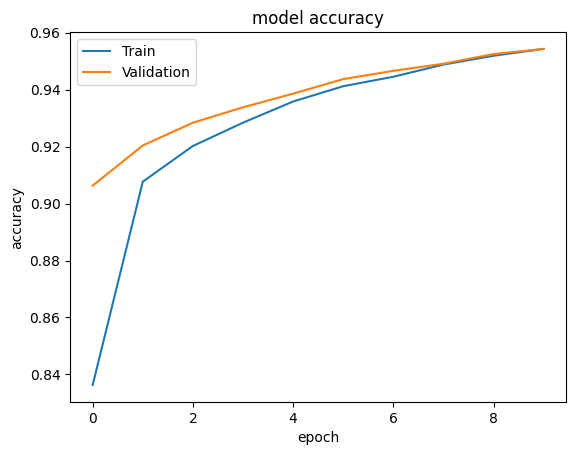

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

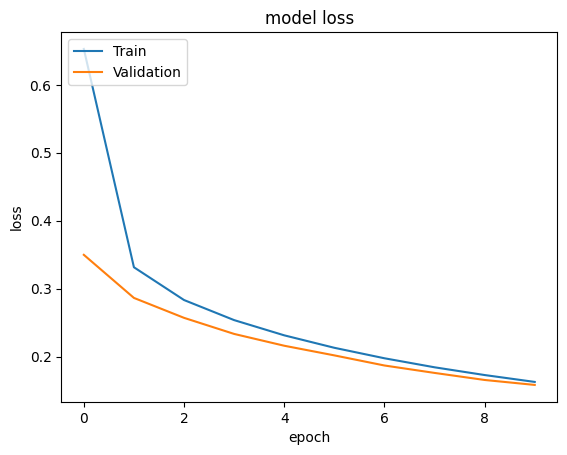

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

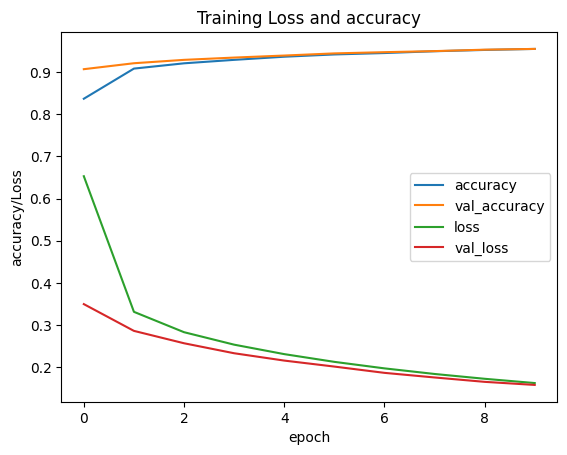

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()